# Install  dependencies  and  setup #

In [1]:
!pip install --upgrade opencv-python --user

In [2]:
!pip install --upgrade tensorflow --user

In [3]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bi

In [133]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

# Remove dodgy images # 

In [134]:
import cv2
import imghdr # pour identifier le type de l'image

In [135]:
data_directory = 'data'

In [136]:
image_exts = ['jpeg','jpg','bmp','png']

In [137]:
os.listdir(os.path.join(data_directory))

['cat', 'dog']

In [139]:
for image_class in os.listdir(data_directory):
    for image in os.listdir(os.path.join(data_directory,image_class)):
        image_path = os.path.join(data_directory,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in extentions list {}'.format(image_path))
                os.remove(image_path)      
        except Exception as e :
                print("Issue with image{}".format(image_path))
                os.remove(image_path)   

Image not in extentions list data\cat\1024x320_gettyimages-1270750767.jpg
Image not in extentions list data\cat\240px-Chat_roux_C3A0_pelage_court..jpg
Image not in extentions list data\cat\2_chatforestier.jpg
Image not in extentions list data\cat\560x315_gettyimages-1247773507.jpg
Image not in extentions list data\cat\bG9jYWw6Ly8vMDAvMDAvMDUvMDUvMzMvMjAwMDAwNTA1MzM4MA.jpg
Image not in extentions list data\cat\chat-illustre-1c4a8b-01x.jpeg
Image not in extentions list data\cat\chat-tenia.webp
Image not in extentions list data\cat\education-chat-86a186356c8a7c4a.jpeg
Image not in extentions list data\cat\erik-jan-leusink-ibpxglgjimi-unsplash-taille1200_644fb3061e7da.jpg
Image not in extentions list data\cat\gettyimages-1367506926.jpg
Image not in extentions list data\cat\i106626-signes-bonne-sante-du-chat.webp
Image not in extentions list data\cat\nationalgeographic_1468861.jpg
Image not in extentions list data\dog\159_contenu1_f51f5de36c_2Pyil3ZhObW.jpg
Image not in extentions list data

In [138]:
for image_class in os.listdir(data_directory):
    for img_nom in os.listdir(os.path.join(data_directory,image_class)):
            print(img_nom)

06haXsrHTUBBP3FLoLwxnyK-6..v1629309963.png
10-astuces-pour-rendre-votre-chat-heureux_5542219.jpg
1024x320_gettyimages-1270750767.jpg
1310591-Chat_American_shorthair.jpg
1310607-Chat_sphinx_ou_sphinx.jpg
18_2.jpg
19403277lpw-19403339-article-chat-etude-felin-jpg_6528763_1250x625.jpg
1964px-Google_Chat_icon_28202029.svg.png
240px-Chat_roux_C3A0_pelage_court..jpg
240px-Collage_of_Six_Cats-02.jpg
2_chatforestier.jpg
44_0_020282292028129.jpg
560x315_gettyimages-1247773507.jpg
7-qualites-du-chat-dont-on-peut-s-inspirer-pour-le-travail.jpeg
7c1b40313dae3d92dc4043eec621f85b2e07b9a8.jpeg
9b5a27fe825ec43bfb082ab1a9100efbe763312c0e40f08379c7f5c09147a6c2.jpg
9c953f5_1675942156998-pns-4816549.jpg
AdobeStock_274957045.jpeg
AdobeStock_2826056282028129.jpeg
age_chat_AdobeStock_204029275.jpg
B9732577112Z.1_20221103201755_0002BGAKLJGHLM.2-0.jpg
B9732622604Z.1_20221109104705_0002BG14LKNGQ8.2-0.jpg
B9733570845Z.1_20230224180249_0002BG4DM9MUEV.1-0.jpeg.jpg
banane-chat.jpg
banner-1544x500.jpg
Bengalshutters

# load data #

In [149]:
dataset =  tf.keras.utils.image_dataset_from_directory('data')

Found 186 files belonging to 2 classes.


In [150]:
data_iterator = dataset.as_numpy_iterator()

In [168]:
batch =  data_iterator.next()

In [152]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [153]:
#tf.keras.utils.image_dataset_from_directory('data',batch_size=8,image_size=(128,128)) pour reconfigurer 

2

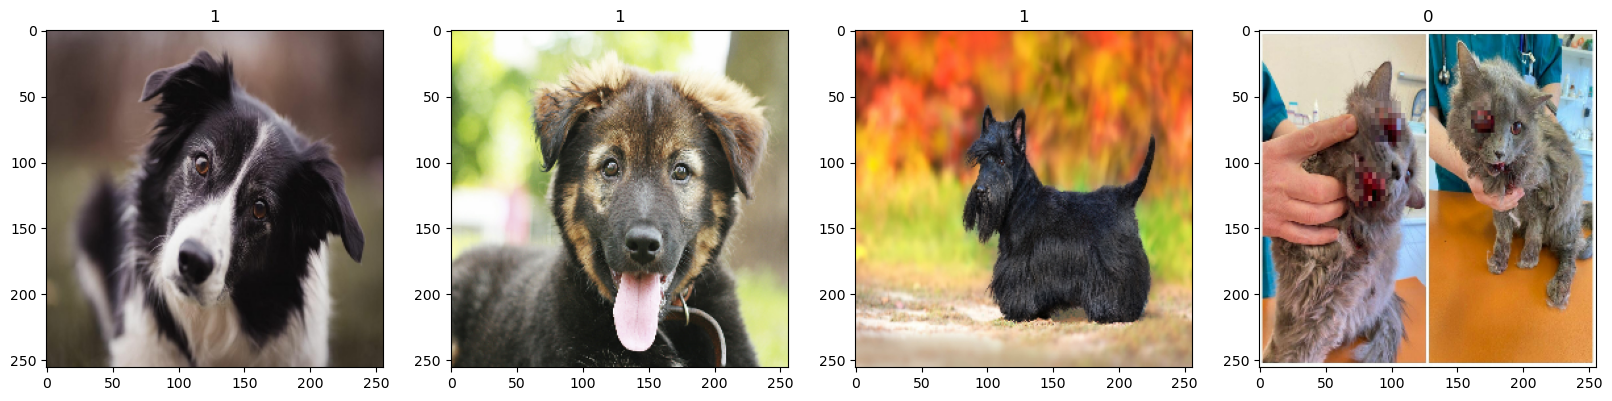

In [155]:
fig , ax =  plt.subplots(ncols=4 , figsize=(20,20))
for idx ,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
# 1: dog
# 0: cat

# Scale the Data #

In [157]:
dataset = dataset.map(lambda x,y:(x/255 , y))

In [156]:
dataset.as_numpy_iterator().next()[0][1].max()

0.991186

# Split the Data #

In [173]:
train_size= int(len(dataset)*.7)
val_size = int(len(dataset)*.2)
test_size = int(len(dataset)*.1)+1

1

In [174]:
train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size+val_size).take(test_size)


4

In [175]:
s= sum([len(x[0]) for x in train])
s

128

In [176]:
s= sum([len(x[0]) for x in val])
s

32

In [177]:
s= sum([len(x[0]) for x in test])
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Build Deep Learning Model #

In [178]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [179]:
model = Sequential()

In [180]:
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [181]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [182]:
logdir='logs'

In [183]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [184]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])#model.summary()

Epoch 1/20
4/4 [==============================] - 10s 2s/step - loss: 1.4134 - accuracy: 0.4531 - val_loss: 0.9448 - val_accuracy: 0.3125
Epoch 2/20
4/4 [==============================] - 9s 2s/step - loss: 0.7244 - accuracy: 0.5312 - val_loss: 0.6922 - val_accuracy: 0.4375
Epoch 3/20
4/4 [==============================] - 9s 2s/step - loss: 0.6862 - accuracy: 0.5469 - val_loss: 0.6357 - val_accuracy: 0.6250
Epoch 4/20
4/4 [==============================] - 9s 2s/step - loss: 0.6988 - accuracy: 0.5234 - val_loss: 0.6815 - val_accuracy: 0.5312
Epoch 5/20
4/4 [==============================] - 9s 2s/step - loss: 0.6688 - accuracy: 0.5391 - val_loss: 0.6657 - val_accuracy: 0.5938
Epoch 6/20
4/4 [==============================] - 10s 2s/step - loss: 0.6554 - accuracy: 0.6406 - val_loss: 0.5826 - val_accuracy: 0.8438
Epoch 7/20
4/4 [==============================] - 9s 2s/step - loss: 0.5588 - accuracy: 0.7656 - val_loss: 0.5619 - val_accuracy: 0.6562
Epoch 8/20
4/4 [=======================

# plot performance #

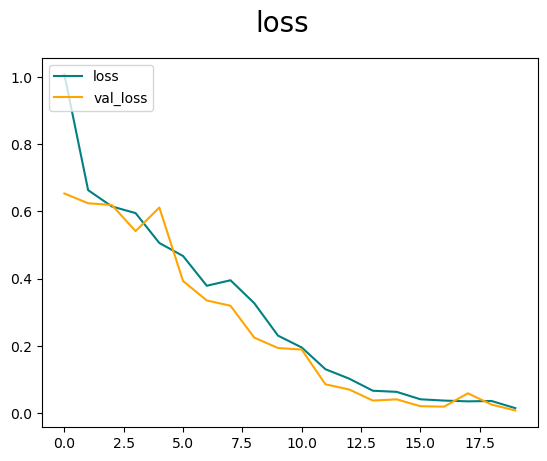

In [124]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# evalute #

In [185]:
from tensorflow.keras.metrics import  BinaryAccuracy

In [186]:
#pre= Precision()
#re= Recall()
acc = BinaryAccuracy()

In [189]:
for batch in test.as_numpy_iterator():
    X,y= batch
    yhat=model.predict(X)
    #pre.update_state(y,yhat)
    #re.update_state(y,yhat)
    acc.update_state(y,yhat)
yhat

1/1 [==============================] - 0s 257ms/step


array([[3.2007877e-02],
       [9.9997157e-01],
       [5.7476708e-03],
       [5.9532452e-02],
       [9.6398342e-01],
       [3.6474951e-02],
       [9.9998540e-01],
       [3.5783777e-03],
       [9.4872534e-01],
       [9.6794358e-03],
       [9.8464233e-01],
       [1.2164605e-08],
       [4.7410067e-02],
       [1.6840678e-03],
       [9.9754292e-01],
       [2.1175011e-03],
       [6.9659096e-03],
       [9.9926782e-01],
       [1.2030193e-01],
       [1.1214953e-02],
       [9.9994856e-01],
       [1.8819012e-02],
       [9.4447452e-01],
       [1.7581485e-02],
       [9.9632847e-01],
       [9.6680701e-01]], dtype=float32)

In [190]:
print(acc.result())

tf.Tensor(0.98717946, shape=(), dtype=float32)


# test #

In [192]:
import cv2

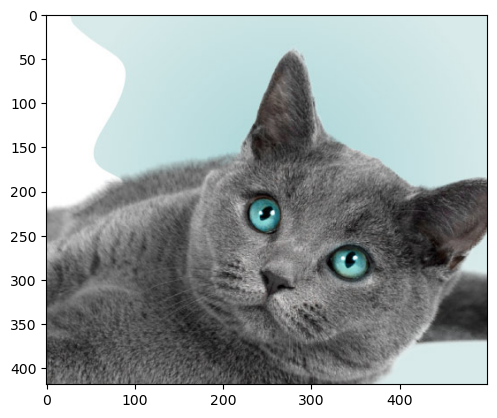

In [207]:
img = cv2.imread('chat_test.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

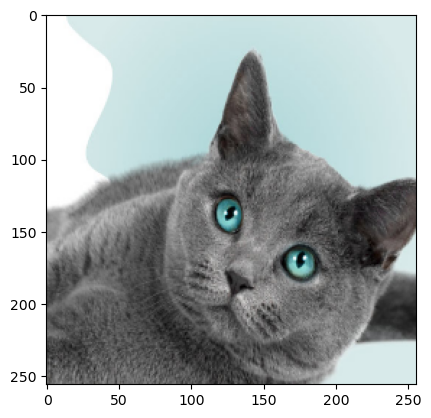

In [208]:
resize= tf.image.resize(img_rgb,(256,256))
plt.imshow(resize.numpy().astype(int))

In [209]:
resize.shape

TensorShape([256, 256, 3])

In [210]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 73ms/step


In [211]:
yhat

array([[0.01798074]], dtype=float32)

In [212]:
if yhat> .5:
    print('predicted class is dog')
else:
    print('predicted class is cat')

predicted class is cat


# save the model #

In [59]:
from tensorflow.keras.models import load_model
model.save(os.path.join('dog_cat_classifier.h5'))

# Use the model #

In [60]:
new_model = load_model('dog_cat_classifier.h5')

In [61]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 94ms/step


array([[0.02505867]], dtype=float32)